In [57]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/all_lc/'

In [58]:
sectors = [pd.read_csv('TESS-Gaia/gaiatess{0}_xmatch_1arsec-result.csv'.format(n+1)) for n in range(15)]

data = pd.concat(sectors,sort=True)

In [59]:
flares = pd.read_csv('1to13_param_out.csv')
unique_tics = np.unique(flares['TIC'])

data_dd = data.drop_duplicates('ticid')
mask = data_dd['ticid'].isin(unique_tics)
tess_gaia = data_dd[mask]

In [60]:
print(len(unique_tics))
print(len(data_dd[mask]))

128258
118939


In [61]:
sorted_tess_gaia = tess_gaia.set_index('ticid')
sorted_tess_gaia = sorted_tess_gaia.reindex(index=unique_tics)

In [62]:
sorted_tess_gaia[0:5]['r_est']

ticid
1078     816.675356
1275     115.981798
1307     113.297048
1454    2064.530847
1608     634.050963
Name: r_est, dtype: float64

In [63]:
sorted_tess_gaia[0:5]['phot_bp_mean_mag'] - sorted_tess_gaia[0:5]['phot_rp_mean_mag']

ticid
1078    1.289843
1275    0.825689
1307    1.015577
1454    0.754116
1608    1.268880
dtype: float64

In [76]:
tics = unique_tics
dist = sorted_tess_gaia['r_est'].values*u.pc
Gbp_min_Grp = sorted_tess_gaia['phot_bp_mean_mag'] - sorted_tess_gaia['phot_rp_mean_mag']

In [77]:
iso_table1 = pd.read_csv('output221284170243.dat.txt', comment='#', delim_whitespace=True)
iso_table2 = pd.read_csv('output768246532491.dat.txt', comment='#', delim_whitespace=True)
print(iso_table1.columns)
print(iso_table2.columns)

Index(['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe',
       'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'pmode',
       'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag',
       'TESSmag', 'Jmag', 'Hmag', 'Ksmag', 'Keplermag', 'gmag', 'rmag', 'imag',
       'zmag', 'DDO51_finfmag'],
      dtype='object')
Index(['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe',
       'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'pmode',
       'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag',
       'Gmag', 'G_BPbrmag', 'G_BPftmag', 'G_RPmag'],
      dtype='object')


In [78]:
iso_table1['Gmag'] = iso_table2['Gmag']
iso_table1['G_BPbrmag'] = iso_table2['G_BPbrmag']
iso_table1['G_BPftmag'] = iso_table2['G_BPftmag']
iso_table1['G_RPmag'] = iso_table2['G_RPmag']

In [79]:
iso_table1.to_csv('isochrones.txt')

In [80]:
iso = pd.read_csv('isochrones.txt')
print(iso.columns)

Index(['Unnamed: 0', 'Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL',
       'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1',
       'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z',
       'mbolmag', 'TESSmag', 'Jmag', 'Hmag', 'Ksmag', 'Keplermag', 'gmag',
       'rmag', 'imag', 'zmag', 'DDO51_finfmag', 'Gmag', 'G_BPbrmag',
       'G_BPftmag', 'G_RPmag'],
      dtype='object')


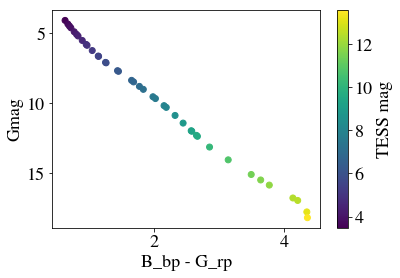

In [99]:
# These are absolute mags
G_B = iso['G_BPbrmag'].values[::-1]
G_R = iso['G_RPmag'].values[::-1]
G_mag = iso['Gmag'].values[::-1]
T = iso['TESSmag'].values[::-1]
BminR = G_B - G_R
mask = (G_B > 4) & (BminR > 0) & (BminR < 4.5)
plt.scatter(BminR[mask], G_B[mask], c=T[mask])
plt.gca().invert_yaxis()
plt.xlabel('B_bp - G_rp')
plt.ylabel('Gmag')
plt.colorbar(label='TESS mag')

TESS_mag_int = np.interp(Gbp_min_Grp, BminR[mask], T[mask])

In [106]:
# Not sure to convert TESS mags into luminosity, lets just use GAIA G band for now
G = sorted_tess_gaia['phot_g_mean_mag']
Mbol = 4.74
L = 10**((Mbol-G)/2.5)

In [107]:
f_out = pd.DataFrame({'TIC':tics, 'dist':dist, 'lum':L, 'G_BPbrmag':sorted_tess_gaia['phot_bp_mean_mag'], 'G_RPmag':sorted_tess_gaia['phot_rp_mean_mag'], 'G_mag':sorted_tess_gaia['phot_g_mean_mag']})
f_out.to_csv('ticGAIA.csv')